<a href="https://colab.research.google.com/github/lawish/EDA_Team_notebook/blob/main/Self_EDA_notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##1.Play store data (main dataset)
This contains data on the Google Play applications. It has 10,841 rows of data witch has following columns:

App Category: Category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

Rating: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

Reviews: number of user reviews each app has received.

Size: The memory size needed to install the application.

Installs: The number of times each application has been installed by users.

Type: Whether the app is free or a paid app.

Price: The price of the app.

Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

Last Updated: Release date of the most recent update for the app.

Current Ver: The app's current version.

Android Ver: The oldest version of Android OS supported by the app.

##2.Sentiment Analysis
This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

App : Name of the app.

Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

##**Importing Data and Modules**

In [1]:
# Importing data analysis and visualization libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading csv file
playstore_df = pd.read_csv('/content/drive/MyDrive/Almabetter/self project/capstone project/Play Store App Review Analysis/Play Store Data.csv')

In [4]:
# Printing fist five rows and all columns in dataFrame.
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore_df.shape

(10841, 13)

###There are 10841 rows and 13 coulmns in our dataset

#1.Data Cleaning for playstore Data


In [7]:
# cheking data type's of features present in our dataset.
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# created copy of our dataset
playstore_df_new = playstore_df.copy()

In [9]:
# created function to convert all MB and Kb in 'size' coulmn to int
def covert_str_(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1000
  elif value[-1:] == 'M':
    return float(value[:-1])*100000
  else:
    return value[:]

In [10]:
playstore_df_new['Size'] = playstore_df_new['Size'].map(lambda x: covert_str_(x))

In [11]:
playstore_df_new['Size'] = playstore_df_new.Size.replace('Varies with device', np.NaN)

In [12]:
# null values generated in Size coulmn
playstore_df_new['Size'].isnull().sum()

1695

In [13]:
# dropping the outlier 
playstore_df_new.drop([10472], inplace=True)

In [14]:
# converted object data type of Size coulmn to  numeric
playstore_df_new['Size'] = pd.to_numeric(playstore_df_new['Size'])

In [15]:
playstore_df_new.dropna(subset=['Size'], inplace=True) # dropped null values of Size coulmn

In [16]:
# removing '+' and ',' prersent in Installs coulmn
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_df_new['Installs']= playstore_df_new['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))


In [17]:
# converted Installs coulmn data type from string to integer
playstore_df_new['Installs'] = playstore_df_new['Installs'].astype('int')

In [18]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   object 
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1000.2+ KB


###**All the coulmns are converted into required Data Types**


###Dropping unwanted columns in dataFrame

In [19]:
# Dropped 'Last Updated','Current Ver','Android Ver' columns from our data Framne 
playstore_df_new.drop(['Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)

In [20]:
playstore_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   object 
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 785.9+ KB


In [21]:
playstore_df_new.describe()

,Rating,Size,Installs
count,7729.000000,9.145000e+03,9.145000e+03
mean,4.173852,2.165634e+06,7.114842e+06
std,0.544563,2.247715e+06,4.619357e+07
min,1.000000,8.500000e+03,0.000000e+00
25%,4.000000,5.100000e+05,1.000000e+03
50%,4.300000,1.300000e+06,1.000000e+05
75%,4.500000,3.000000e+06,1.000000e+06
max,5.000000,1.000000e+07,1.000000e+09


###Which category of Apps from the Content Rating column are found more on playstore

In [22]:
Category = playstore_df_new['Content Rating'].value_counts().index
Values = playstore_df_new['Content Rating'].value_counts()

Category_list = []
Values_list = []
for i in range(len(Category)):
    Category_list.append(Category[i])
    Values_list.append(Values[i])

In [23]:
print(Category_list)

['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated']


In [24]:
print(Values_list)

[7416, 987, 406, 332, 2, 2]


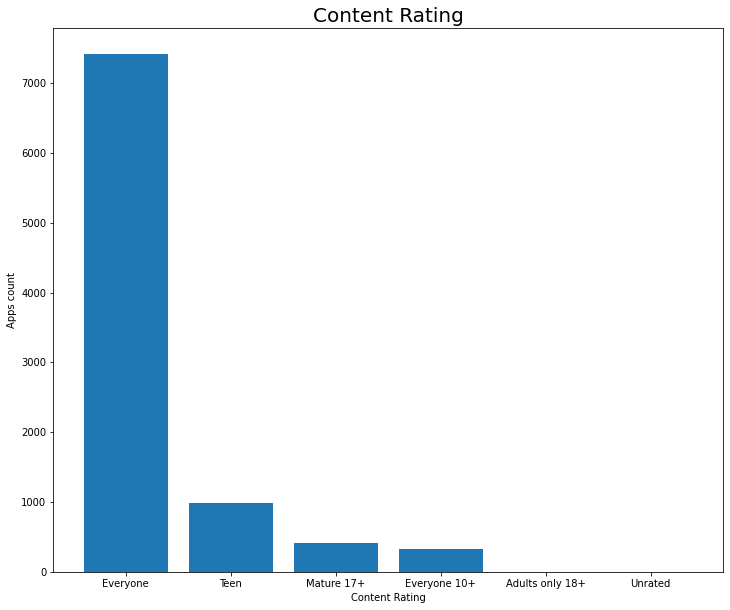

In [25]:
# Plotting the bar graph to visualize Content Rating.
plt.figure(figsize=(12,10))
plt.bar(Category_list,Values_list,width=0.8, alpha= 1);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps count');
plt.xlabel('Content Rating');

###**From the above plot we can see that Everyone category having majority of apps count.** 

In [26]:
# Creating DataFrame for Category wise apps installs
highest_Installs_df = playstore_df_new.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
highest_Installs_df.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


In [27]:
top_Apps_df = playstore_df_new.groupby('App')[['Installs']].sum().sort_values(by='Installs', ascending=False)
top_Apps_df.head()

,Installs
App,
Subway Surfers,6000000000
Google News,4000000000
Candy Crush Saga,3500000000
Temple Run 2,3000000000
Pou,2000000000


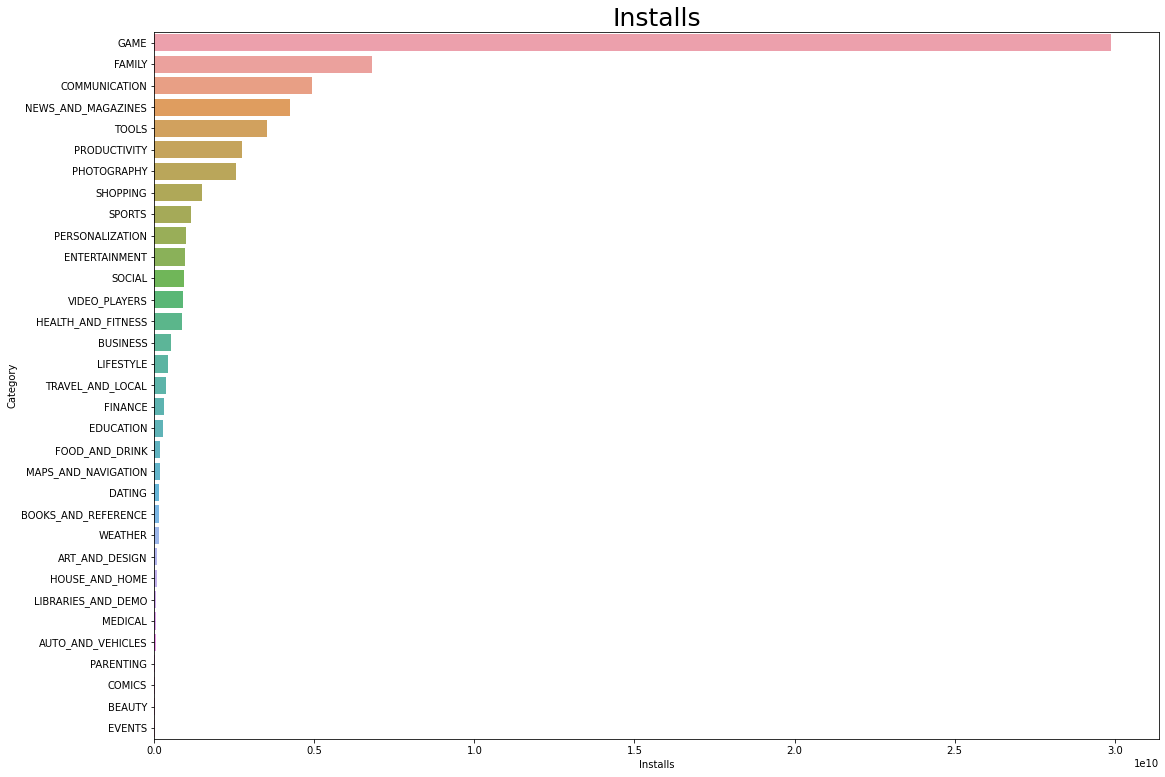

In [28]:
x3sis = []
y3sis = []

for i in range(len(highest_Installs_df)):
    x3sis.append(highest_Installs_df.Installs[i])
    y3sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x3sis, y = y3sis, alpha =0.9)
graph.set_title("Installs", fontsize = 25);

####**From above plot we can see 'GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS' are the most installed category on Playstore.**

####**Let's Visualize top category wise Apps and see which apps is installed most on the playstore** 

###Top installed apps in any category

In [29]:
# created function for getting top apps w.r.t category
def top_apps_in_category(str):
    top = playstore_df_new[playstore_df_new['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(12,8))
    plt.title('Top Installed Apps',size = 20)    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

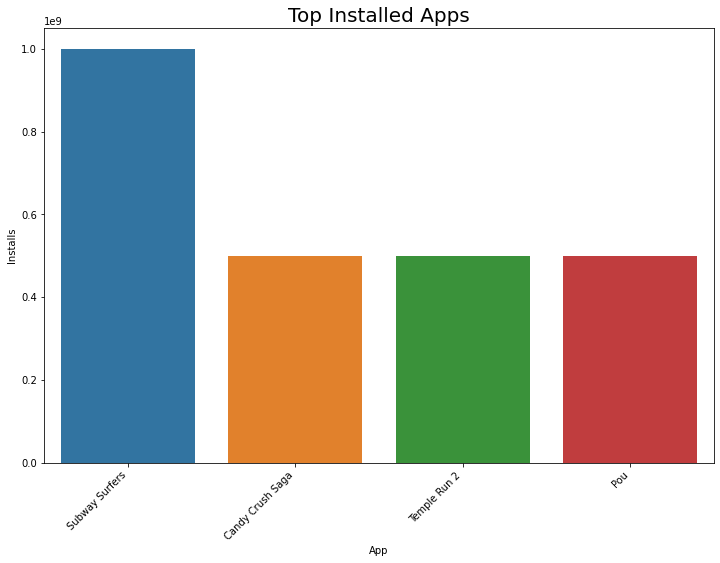

In [30]:
# Top apps for game Category
top_apps_in_category('GAME')

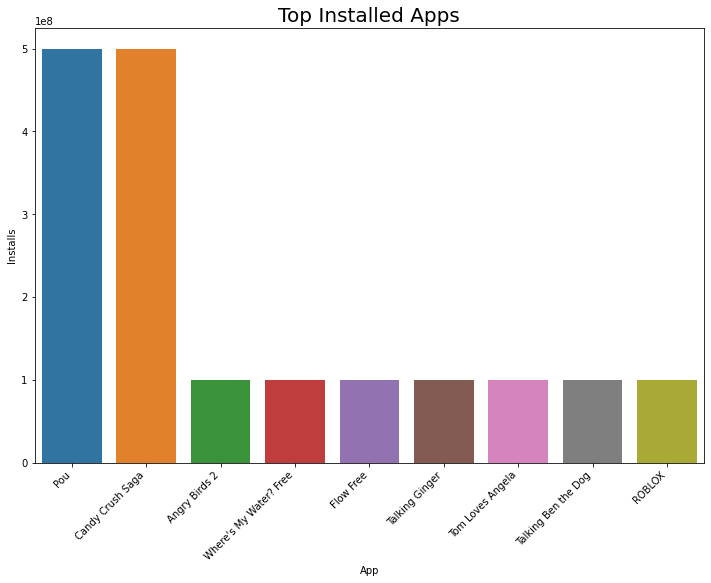

In [31]:
# Top apps for Family Category
top_apps_in_category('FAMILY')

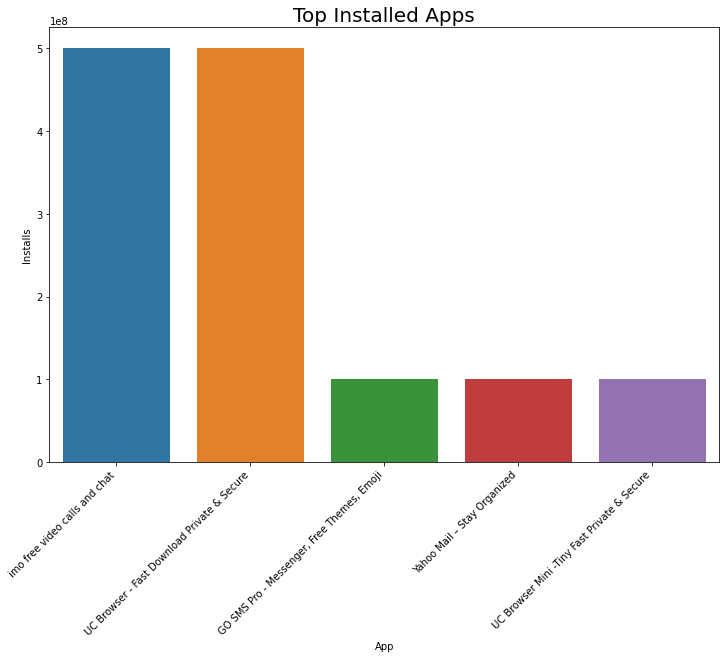

In [32]:
# Top apps for COMMUNICATION Category
top_apps_in_category('COMMUNICATION')

###Make a jointplot to understand the effect of size on rating

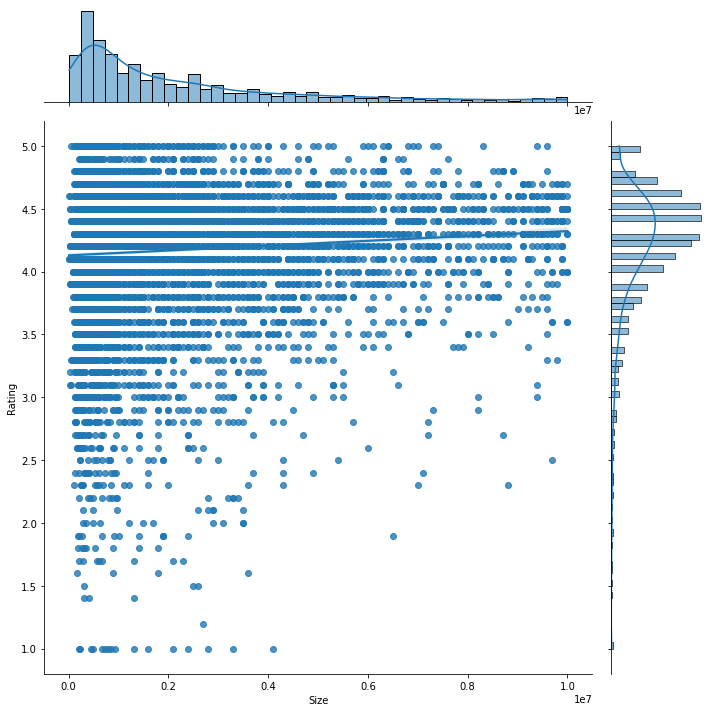

In [37]:
# Make a jointplot to understand the effect of size on rating
sns.jointplot(x = 'Size', y= 'Rating', data = playstore_df_new, kind='reg', height=10);

###**From above jointplot we can see the app size increases less no of rating.**
###**We can say that as app size increase less no of users will use it.**
###**Most user gives rating more than 3 - 3.5 to larger size of apps it might be due to its great features.**

##**Sentiment Analysis**

In [38]:
# Loading and Cleaning the User Reviews Dataset
user_reviews_df = pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project - Playstore Data analysis /Play Store App Review Analysis/User Reviews.csv')

In [39]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [40]:
user_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [41]:
# Dropped null values present in the user_reviews data frame
user_reviews_df.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'], inplace=True)

In [42]:
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [43]:
# Merge reviews dataset with apps
merge_df_new = pd.merge(user_reviews_df,playstore_df_new,on='App',how='inner')

In [44]:
# Printing first five rows of merge dataset.
merge_df_new.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,380000.0,500000,Free,0,Everyone 10+,Health & Fitness
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,380000.0,500000,Free,0,Everyone 10+,Health & Fitness
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,380000.0,500000,Free,0,Everyone 10+,Health & Fitness
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,380000.0,500000,Free,0,Everyone 10+,Health & Fitness
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,380000.0,500000,Free,0,Everyone 10+,Health & Fitness


##Sentiment polarity for paid and free apps

In [46]:
free_apps = merge_df_new[merge_df_new["Type"] == "Free"]
paid_apps = merge_df_new[merge_df_new["Type"] == "Paid"]

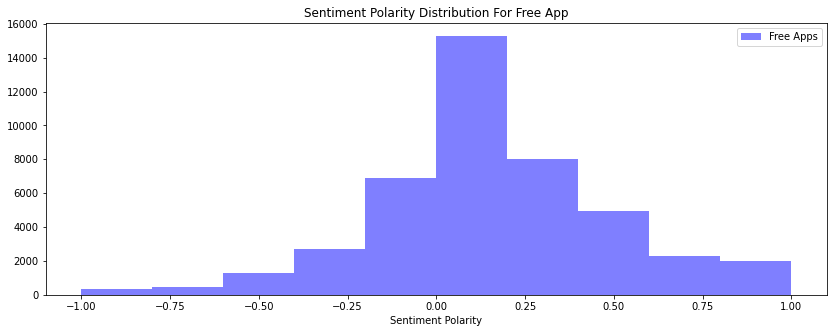

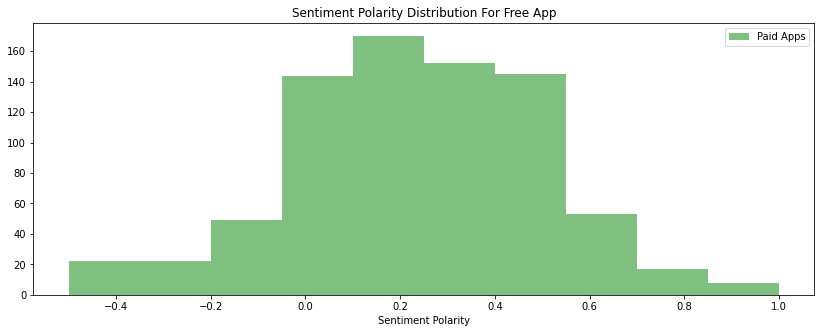

In [47]:
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Polarity"], color="blue",alpha=.5, label="Free Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()
print("\n")
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Polarity"], color="green",alpha=.5, label="Paid Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

In [48]:
print("Free apps sentiment percentage\n{}".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("\n")
print("Paid Apps - Sentiment Percentage \n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free apps sentiment percentage
Positive    62.224381
Negative    26.497831
Neutral     11.277788
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


###**Positive Sentiment percentage for paid apps is more than free apps it may be it's less number of Install**

##Sentiment polarity for paid and free apps

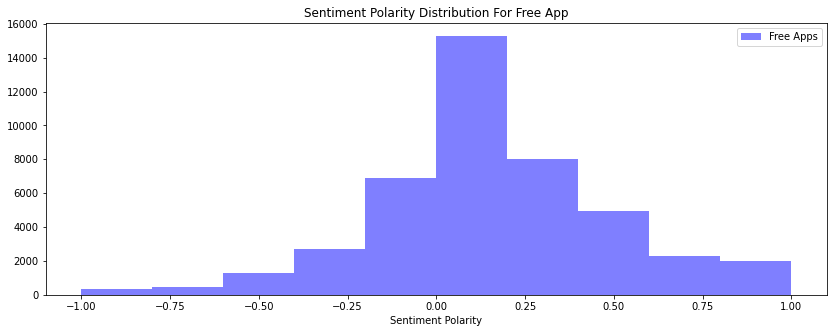

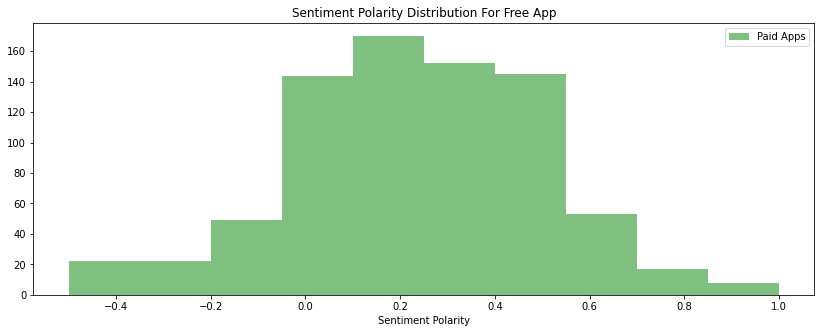

In [49]:
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Polarity"], color="blue",alpha=.5, label="Free Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()
print("\n")
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Polarity"], color="green",alpha=.5, label="Paid Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()